In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [8]:
medical = pd.read_csv('medical_examination.csv', index_col='id')

medical

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1


In [9]:
# Add 'bmi' and 'overweight' columns

bmi = medical['weight'] / (medical['height'] / 100) ** 2

medical['bmi'] = bmi.round(2)

overweight_true_filter = bmi > 25

overweight_false_filter = bmi <= 25

medical['overweight'] = None

medical.loc[overweight_true_filter, 'overweight'] = 1

medical.loc[overweight_false_filter, 'overweight'] = 0

In [10]:
# Normalize data
# Make 0 always good and 1 always bad. 
# If the value of 'cholesterol' or 'gluc' is 1, make the value 0. 
# If the value is more than 1, make the value 1.

medical.loc[:, 'cholesterol'] = medical['cholesterol'].map({1: 0, 2: 1, 3: 1})
medical.loc[:, 'gluc'].replace({1: 0, 2: 1, 3: 1}, inplace=True)

print(medical['cholesterol'].value_counts(normalize=True))
medical['gluc'].value_counts(normalize=True)


0    0.748357
1    0.251643
Name: cholesterol, dtype: float64


0    0.8497
1    0.1503
Name: gluc, dtype: float64

## FIGURE 1 - categorical plot

In [19]:
# Draw Categorical Plot
def draw_cat_plot():
    
    # Create DataFrame for cat plot using `pd.melt` using just the values 
    # from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = None


    # Group and reformat the data to split it by 'cardio'. 
    # Show the counts of each feature. 
    # You will have to rename one of the collumns for the catplot to work correctly.
    df_cat = None

    # Draw the catplot with 'sns.catplot()'



    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig

In [14]:
subjective_features = ['smoke', 'alco', 'active']

examination_features = ['cholesterol', 'gluc', 'overweight']

target = 'cardio'

features = medical.loc[:, subjective_features + examination_features + [target]]
features

In [16]:
melted = pd.melt(features, id_vars='cardio')
melted

,cardio,variable,value
0,0,smoke,0
1,1,smoke,0
2,1,smoke,0
3,1,smoke,0
4,0,smoke,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [17]:
# melted_0 = melted.loc[(melted.cardio == 0), :]
# melted_0

Text(0.5, 1.0, 'cardio = 1')

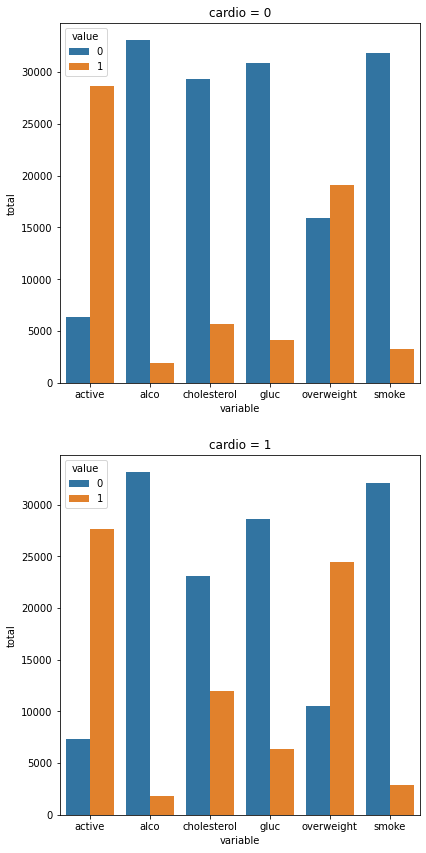

In [36]:
# 1
# sns.catplot(x='variable', hue='value', data=melted_0, kind='count')

# 2
fig = plt.figure(figsize=(5, 10))
ax1 = fig.add_axes([0, 0, 1, 0.5])
ax0 = fig.add_axes([0, 0.6, 1, 0.5])

cols = sorted(list(features.drop('cardio', axis=1).columns))
# sns.catplot(x='variable', hue='value', data=melted[melted.cardio == 0],
#             ax=ax1, 
#             kind='count', 
#             hue_order=(0, 1), 
#             order=cols)
sns.countplot(x='variable', hue='value', data=melted[melted.cardio == 0],
            ax=ax0,  
            hue_order=(0, 1), 
            order=cols)
sns.countplot(x='variable', hue='value', data=melted[melted.cardio == 1],
            ax=ax1,  
            hue_order=(0, 1), 
            order=cols)

ax0.set_ylabel('total')
ax1.set_ylabel('total')
ax0.set_title('cardio = 0')
ax1.set_title('cardio = 1')


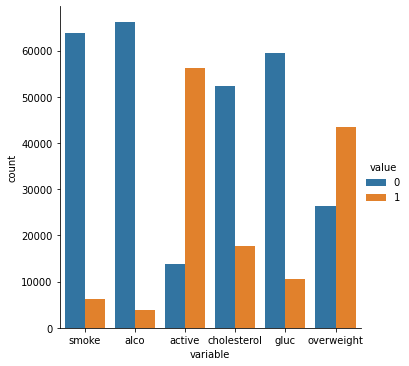

In [30]:
sns.catplot(x='variable', hue='value', data=melted, kind='count', legend_out=True)

## Count-plot By Hand

### Group by 'cardio'

In [21]:
cardio_gr = features.groupby(['cardio'])
cardio_gr

In [22]:
cardio_0 = cardio_gr.get_group(0)
cardio_0

,smoke,alco,active,cholesterol,gluc,overweight,cardio
0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0
5,0,0,0,1,1,1,0
6,0,0,1,1,0,1,0
8,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...
69987,0,0,1,0,0,0,0
69988,0,0,1,0,0,0,0
69991,0,0,1,1,1,1,0
69995,1,0,1,0,0,1,0


In [23]:
cardio_1 = cardio_gr.get_group(1)
cardio_1

,smoke,alco,active,cholesterol,gluc,overweight,cardio
1,0,0,1,1,0,1,1
2,0,0,0,1,0,0,1
3,0,0,1,0,0,1,1
7,0,0,1,1,1,1,1
15,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...
69993,0,0,1,0,0,0,1
69994,0,0,1,0,0,1,1
69996,0,0,1,1,1,1,1
69997,0,1,0,1,0,1,1


### Melt

In [24]:
melt_0 = pd.melt(cardio_0.drop(columns=['cardio']))
melt_0

,variable,value
0,smoke,0
1,smoke,0
2,smoke,0
3,smoke,0
4,smoke,0
...,...,...
210121,overweight,0
210122,overweight,0
210123,overweight,1
210124,overweight,1


In [25]:
melt_1 = pd.melt(cardio_1.drop(columns=['cardio']))
melt_1

,variable,value
0,smoke,0
1,smoke,0
2,smoke,0
3,smoke,0
4,smoke,0
...,...,...
209869,overweight,0
209870,overweight,1
209871,overweight,1
209872,overweight,1


### Aggregation

**group by variable applying count (value count)  
or  
group by variable and value**

In [26]:
agg_0 = melt_0.groupby(['variable', 'value'])
agg_0

In [28]:
agg_0.agg(len)

variable     value
active       0         6378
             1        28643
alco         0        33080
             1         1941
cholesterol  0        29330
             1         5691
gluc         0        30894
             1         4127
overweight   0        15915
             1        19106
smoke        0        31781
             1         3240
dtype: int64

<AxesSubplot:xlabel='variable,value'>

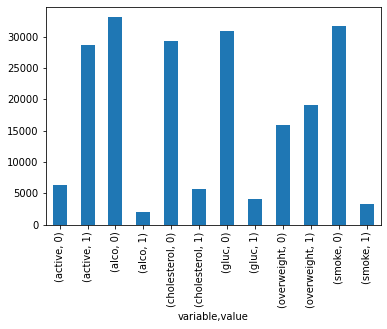

In [29]:
data_fig1 = agg_0.agg(len)
data_fig1.plot(kind='bar')